In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords
import string

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Myntra kurtis.csv to Myntra kurtis.csv


In [ ]:
data = pd.read_csv("Myntra kurtis.csv")
print(data.tail())

        Brand Name                                        Product URL Image  \
594       FAWOMENT  https://www.myntra.com/kurtis/fawoment/fawomen...   NaN   
595       Fabindia  https://www.myntra.com/kurtis/fabindia/fabindi...   NaN   
596  all about you  https://www.myntra.com/kurtis/all-about-you/al...   NaN   
597        MALHAAR  https://www.myntra.com/kurtis/malhaar/malhaar-...   NaN   
598         Pistaa  https://www.myntra.com/kurtis/pistaa/pistaa-ye...   NaN   

     Product Ratings  Number of ratings              Product Info  \
594              NaN                  0  Floral Embroidered Kurti   
595              NaN                  0         Yoke Design Kurti   
596              NaN                  0  Yoke Design A-Line Kurti   
597              4.8                  6         Pure Cotton Kurti   
598              4.4                 25         Embroidered Kurti   

     Selling Price   Price        Discount  
594          911.0  3037.0       (70% OFF)  
595         1959.0  

In [ ]:
print(data.head())

       Brand Name                                        Product URL  \
0  Rain & Rainbow  https://www.myntra.com/kurtis/rain--rainbow/ra...   
1        HERE&NOW  https://www.myntra.com/kurtis/herenow/herenow-...   
2           Anouk  https://www.myntra.com/kurtis/anouk/anouk-wome...   
3       Anubhutee  https://www.myntra.com/kurtis/anubhutee/anubhu...   
4           GERUA  https://www.myntra.com/kurtis/gerua/gerua-wome...   

                                               Image  Product Ratings  \
0  https://assets.myntassets.com/dpr_2,q_60,w_210...              4.2   
1  https://assets.myntassets.com/dpr_2,q_60,w_210...              4.2   
2  https://assets.myntassets.com/dpr_2,q_60,w_210...              4.2   
3  https://assets.myntassets.com/dpr_2,q_60,w_210...              4.3   
4  https://assets.myntassets.com/dpr_2,q_60,w_210...              4.2   

   Number of ratings                               Product Info  \
0                 28                  Printed Pure Cotton Kur

In [ ]:
print(data.describe())

       Product Ratings  Number of ratings  Selling Price        Price
count       401.000000         599.000000     525.000000   525.000000
mean          4.191771          79.262104     779.695238  1865.729524
std           0.379549         232.759927     530.983362   772.987426
min           1.500000           0.000000     274.000000   400.000000
25%           4.000000           0.000000     539.000000  1499.000000
50%           4.200000          11.000000     659.000000  1739.000000
75%           4.400000          42.000000     809.000000  1999.000000
max           5.000000        2800.000000    4720.000000  5900.000000


In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand Name         599 non-null    object 
 1   Product URL        599 non-null    object 
 2   Image              132 non-null    object 
 3   Product Ratings    401 non-null    float64
 4   Number of ratings  599 non-null    int64  
 5   Product Info       599 non-null    object 
 6   Selling Price      525 non-null    float64
 7   Price              525 non-null    float64
 8   Discount           525 non-null    object 
dtypes: float64(3), int64(1), object(5)
memory usage: 42.2+ KB
None


In [ ]:
print(data.isnull().sum())

Brand Name             0
Product URL            0
Image                467
Product Ratings      198
Number of ratings      0
Product Info           0
Selling Price         74
Price                 74
Discount              74
dtype: int64


In [ ]:
data = data.drop("Image",axis=1)

In [ ]:
data = data.dropna()

In [ ]:
print(data.shape)

(364, 8)


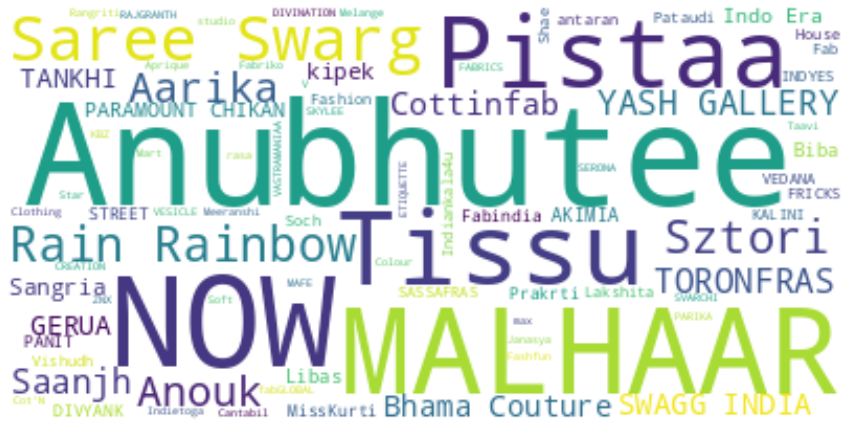

In [ ]:
text = " ".join(i for i in data["Brand Name"])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
highest_rated = data.sort_values(by=["Product Ratings"],
                                 ascending=False)
highest_rated = highest_rated.head(10)
print(highest_rated[['Product Info', "Product Ratings", "Brand Name"]])

                        Product Info  Product Ratings        Brand Name
435            Mandarin Collar Kurti              5.0            INDYES
249      Floral Printed Kaftan Kurta              5.0           Sangria
448          Solid Pure Cotton Kurti              5.0           MALHAAR
308             Floral Printed Kurti              5.0           MALHAAR
538                Pure Cotton Kurti              5.0           MALHAAR
277    Women Solid Embellished Kurti              5.0          Fabindia
515     Chikankari Embroidered Kurti              5.0  PARAMOUNT CHIKAN
62       Ethnic Motifs Printed Kurti              4.9              Biba
80   Ethnic Motifs Embroidered Kurti              4.8           Sangria
450      Self Striped Straight Kurti              4.8            Saanjh


## score = (n1/(n1+m1) * a1) + (m1/(m1+n1) * m1r)  

In [ ]:
m1r = data['Product Ratings'].mean()
m1 = data['Number of ratings'].quantile(0.9)
n1 = data['Number of ratings']
a1 = data['Product Ratings']
data["Score"]  = (n1/(n1+m1) * a1) + (m1/(m1+n1) * m1r)

Recommendations = data.sort_values('Score', ascending=False)

print(Recommendations[['Brand Name', 'Product Info',
                       'Product Ratings', 'Score',
                       'Selling Price', 'Discount']].head(10))

         Brand Name                                       Product Info  \
48            Tissu                    Women Floral Print A-Line Kurti   
11        Anubhutee                        Ethnic Motifs Printed Kurti   
155       Anubhutee                                Women Printed Kurti   
66     YASH GALLERY                               Printed A-Line Kurti   
27        Anubhutee                       Women Printed Straight Kurti   
102          AKIMIA                      Embroidered Pure Cotton Kurti   
88            Tissu                Women Floral Printed Straight Kurti   
3         Anubhutee                        Ethnic Motifs Printed Kurti   
42   Rain & Rainbow  Women Printed Pure Cotton Pure Cotton A-Line K...   
18            GERUA                        Ethnic Motifs Printed Kurti   

     Product Ratings     Score  Selling Price   Discount  
48               4.4  4.338320          549.0  (45% OFF)  
11               4.4  4.300868          521.0  (70% OFF)  
155     